# Quantum State Prep for N=1 SrF Molecules

In [2]:
#import necessary packages for ^2Sigma diatomic molecule calculations
import numpy as np
from numpy.linalg import eigh
import matplotlib.pyplot as plt
import pandas
import sys, os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from diatomic import hyperfine_hamiltonian_no_field, Zeeman_hamiltonian, SrFConstants, sort_eigenstates

(16, 16)


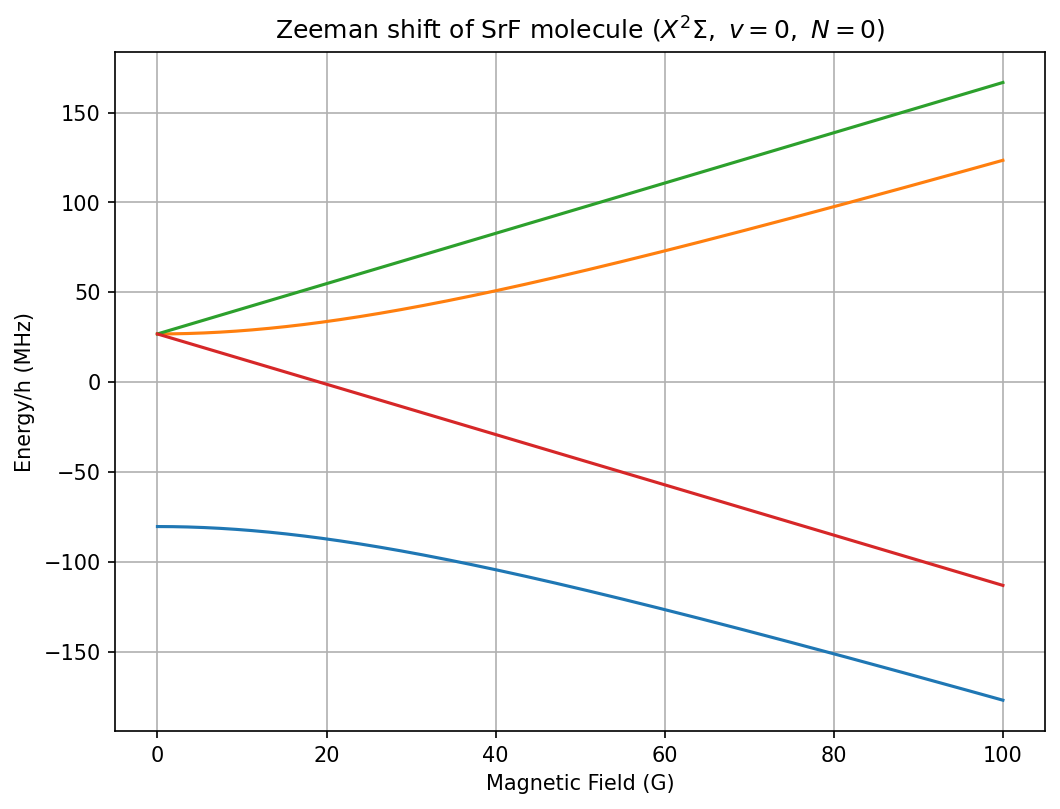

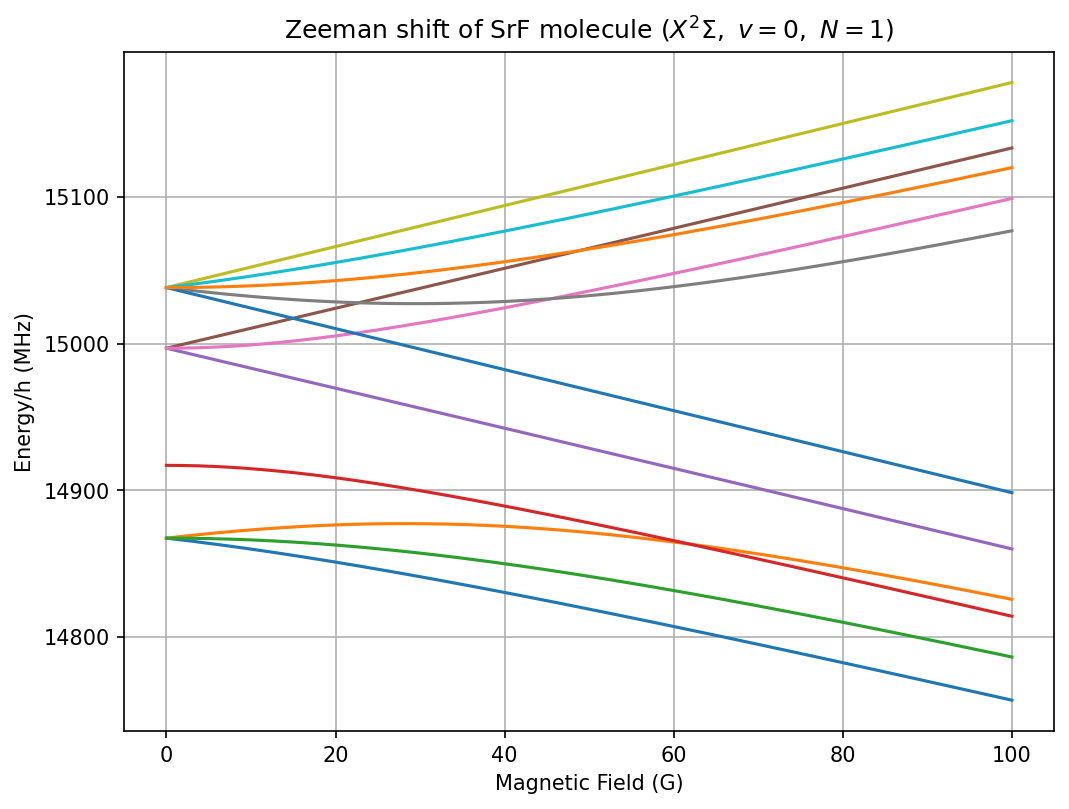

In [3]:
Nmax = 1 #compute hf energies from N=0 up to N=Nmax.
H0 = hyperfine_hamiltonian_no_field(Nmax, SrFConstants) # generate field-free hamiltonian. the dimension is (2*S+1)*(2*I+1)*(Nmax+1)^2.
Hz = Zeeman_hamiltonian(Nmax, SrFConstants, Bfield=np.array([0, 0, 1])) # generate Zeeman hamiltonian. B-field B = B\hat{z}.

print(H0.shape)

Bz_list = np.linspace(0, 100, 1000) # range from 0 to 100 G B-field in 100 mG increments
energies_list = np.empty((len(Bz_list), H0.shape[0]), dtype=np.complex_) #for us, 100 x 16 2d array.
states_list = np.empty((len(Bz_list), H0.shape[0], H0.shape[0]), dtype=np.complex_) #for us, 100 x 16 x 16 3d array.

#diagonalize the combined field-free + zeeman hamiltonian to obtain eigenenergies and eigenstates.
for i, Bz in enumerate(Bz_list):
    H = H0 + Hz * Bz
    energies, states = eigh(H) # diagonalize matrix
    energies_list[i] = energies/1e6
    states_list[i] = states

energies_list, states_list = sort_eigenstates(energies_list, states_list)

#note that energies are defined relative to the "hf-free" transition energy of N=0 to N=1 being 14975.2277 MHz

plt.figure(figsize=(8, 6), dpi=150)
plt.plot(Bz_list, np.real(energies_list[:, 0:4])) # plot N=0 states

plt.ylabel("Energy/h (MHz)")
plt.xlabel("Magnetic Field (G)")
plt.title("Zeeman shift of SrF molecule ($X^2\Sigma,\ v=0,\ N=0$)")
plt.grid()
plt.show()

plt.figure(figsize=(8, 6), dpi=150)
plt.plot(Bz_list, np.real(energies_list[:, 4:16])) # plot N=1 states

plt.ylabel("Energy/h (MHz)")
plt.xlabel("Magnetic Field (G)")
plt.title("Zeeman shift of SrF molecule ($X^2\Sigma,\ v=0,\ N=1$)")
plt.grid()
plt.show()

Two tasks remain: 
1. Compute necessary B-field for splitting N=0, F=1 into distinct Zeeman sublevels (single quantum state.)
2. Compute necessary B-field to be applied to allow for a nonzero TDM from N=1, F=0 to N=0, F=0 (a better single quantum state and the one for MW shielding.) Also compute this TDM if possible.

In [4]:
print(np.real(energies_list[0:100, 2]-energies_list[0:100, 1]))
#difference in energy between N=0,F=1,mF=1 and N=0,F=1,mF=0, in MHz.
#for 100 mG applied field, the difference is already 140 kHz, which is enough to distinguish.

[1.06581410e-14 1.39880486e-01 2.79392775e-01 4.18536878e-01
 5.57312815e-01 6.95720611e-01 8.33760302e-01 9.71431928e-01
 1.10873554e+00 1.24567119e+00 1.38223895e+00 1.51843889e+00
 1.65427109e+00 1.78973563e+00 1.92483261e+00 2.05956213e+00
 2.19392431e+00 2.32791925e+00 2.46154709e+00 2.59480795e+00
 2.72770197e+00 2.86022931e+00 2.99239012e+00 3.12418455e+00
 3.25561278e+00 3.38667499e+00 3.51737135e+00 3.64770206e+00
 3.77766733e+00 3.90726734e+00 4.03650233e+00 4.16537250e+00
 4.29387809e+00 4.42201933e+00 4.54979646e+00 4.67720974e+00
 4.80425942e+00 4.93094576e+00 5.05726903e+00 5.18322952e+00
 5.30882750e+00 5.43406327e+00 5.55893713e+00 5.68344938e+00
 5.80760034e+00 5.93139033e+00 6.05481966e+00 6.17788869e+00
 6.30059773e+00 6.42294716e+00 6.54493731e+00 6.66656854e+00
 6.78784123e+00 6.90875575e+00 7.02931247e+00 7.14951179e+00
 7.26935410e+00 7.38883979e+00 7.50796928e+00 7.62674297e+00
 7.74516129e+00 7.86322466e+00 7.98093351e+00 8.09828828e+00
 8.21528942e+00 8.331937

The code was written in the uncoupled basis |N,mN>|S,mS>|I,mI> where all Zeeman sublevels iterate from largest to smallest.

For N=0, the correspondence between our uncoupled basis states (the indices) and the coupled basis |F, mF> that we're familiar with is:

0. |0,0>|0.5,0.5>|0.5,0.5> = N=0,F=1,mF=1
1. |0,0>|0.5,-0.5>|0.5,0.5> 
2. |0,0>|0.5,0.5>|0.5,-0.5> 
3. |0,0>|0.5,-0.5>|0.5,-0.5> = N=0,F=1,mF=-1

And the order listed for diagonalization is:

0. N=0,F=0 -> 1/sqrt(2) (|0,-1/2,1/2> - |0,1/2,-1/2>)
1. N=0,F=1,mF=0 -> 1/sqrt(2)(|0,-1/2,1/2> + |0,1/2,-1/2>)
2. N=0,F=1,mF=1 -> |0,1/2,1/2>
3. N=0,F=1,mF=-1 -> |0,-1/2,-1/2>

For N=1, I can only list the order of the diagonalized eigenstates in the coupled basis.

4. N=1,J=1/2,F=1,mF=1
5. N=1,J=1/2,F=1,mF=-1
6. N=1,J=1/2,F=1,mF=0
7. N=1,J=1/2,F=0
8. N=1,J=3/2,F=1,mF=-1
9. N=1,J=3/2,F=1,mF=1
10. N=1,J=3/2,F=1,mF=0
11. N=1,J=3/2,F=2,mF=-1
12. N=1,J=3/2,F=2,mF=2
13. N=1,J=3/2,F=2,mF=1
14. N=1,J=3/2,F=2,mF=-2
15. N=1,J=3/2,F=2,mF=0

We know that the free-field eigenstates should match the hf eigenstates. From this, we can deduce the TDM in the presence of a B-field by taking inner products of the Zeeman eigenstates with the free-field eigenstates. Henceforth, indices refer to the coupled basis.

Our states of interest for single quantum state prep are state 0 and state 7.
State 0 likely gains some admixture from state 3, with lesser contributions from 1 and 2.
State 7 likely gains admixture from 4, with lesser contributions from 5, 6, and 8.

In [16]:
#first, determine admixtures in state 0
print(np.dot(np.real(states_list[200, :, 7]),np.real(states_list[0, :, 11]))) 

0.008432340420617884


My prediction was actually quite off. 

At B = 5 G, state 0 only gains admixture from state 1. It becomes: -0.997878|N=0, F=0> + 0.065115|N=0,F=1,mF=0>.

At B = 10 G, state 0 becomes: -0.991796|N=0, F=0> + 0.12783|N=0,F=1,mF=0>.

At B = 20 G, state 0 becomes: -0.9709964|N=0, F=0> + 0.239094|N=0,F=1,mF=0>.

At B = 5 G, state 7 gains admixture from 15, 11, 10, 8, and 6. It becomes:
-0.9961|N=1,J=1/2,F=0> + 0.019496|N=1,J=1/2,F=1,mF=0> - 0.03033|N=1,J=3/2,F=1,mF=-1> + 0.0804|N=1,J=3/2,F=1,mF=0> - 0.000614|N=1,J=3/2,F=2,mF=-1> + 0.001677|N=1,J=3/2,F=2,mF=0>.

At B = 10 G, state 7 becomes:
-0.9852|N=1,J=1/2,F=0> + 0.038437|N=1,J=1/2,F=1,mF=0> - 0.058805|N=1,J=3/2,F=1,mF=-1> + 0.1559|N=1,J=3/2,F=1,mF=0> - 0.002372|N=1,J=3/2,F=2,mF=-1> + 0.006481|N=1,J=3/2,F=2,mF=0>.

At B = 20 G, state 7 becomes:
0.95084|N=1,J=1/2,F=0> -0.07326|N=1,J=1/2,F=1,mF=0> + 0.10583|N=1,J=3/2,F=1,mF=-1> - 0.28058|N=1,J=3/2,F=1,mF=0> + 0.008432|N=1,J=3/2,F=2,mF=-1> -0.023039|N=1,J=3/2,F=2,mF=0>.

After obtaining this, we can use the coupling matrix derived in Thomas's paper to compute the fractional contribution to the body-frame PDM, i.e. the TDM.
Upon doing this, I should check whether this equates with what's obtained with the dipole moment function in evaluation.py. 

In [17]:
d0 = 3.47 #body frame PDM between N = 0 and N = 1 of X state.

#initial and final state vectors for B = 5 G

initket = np.array([-0.997878, 0.065115, 0, 0])
finket = np.array([0, 0, 0.019496, -0.9961, -0.03033, 0, 0.0804, -0.000614, 0, 0, 0, 0.001677])

#J-mixing parameters
aparam = 0.888
bparam = 0.46

#coupling matrices for all polarizations
#thomas's convention is row -> N = 1, col -> N = 0.
#the order of rows in our units is: 5, 6, 4, 7, 8, 10, 9, 14, 11, 15, 13, 12
#therefore in our units, the row order should be: 3rd, 1st, 2nd, 4th, 5th, 7th, 6th, 9th, 12th, 11th, 8th, 10th
#the order of cols in our units is: 3, 1, 2, 0
#therefore in our units, the col order should be: 4th, 2nd, 3rd, 1st
cmatlcirc = np.array([[-aparam/3-bparam*np.sqrt(2)/3, aparam/3-bparam/(3*np.sqrt(2)), 0, 0],[0,0,0,0],[0,0,0,aparam/3-bparam/(3*np.sqrt(2))],
                    [0,0,0,1/3],[0,0,0,0],[aparam*np.sqrt(2)/3-bparam/3, aparam/(3*np.sqrt(2))+bparam/3,0,0],[0,0,0,aparam/(3*np.sqrt(2))+bparam/3],
                    [0,0,0,0],[0,0,1/np.sqrt(3),0],[0,1/np.sqrt(6),0,0],[0,0,0,0],[0,0,0,1/(3*np.sqrt(2))]])

cmatlin = np.array([[0,0,-aparam/3+bparam/(3*np.sqrt(2)),0],[0,0,0,aparam/3-bparam/(3*np.sqrt(2))],[-aparam/3-bparam*np.sqrt(2)/3,0,0,0],[0,-1/3,0,0],
                    [0,0,0,aparam/(3*np.sqrt(2))+bparam/3], [0,0,-aparam/(3*np.sqrt(2))-bparam/3,0],[aparam*np.sqrt(2)/3-bparam/3,0,0,0],
                    [0,0,0,1/np.sqrt(6)],[0,0,0,0],[0,0,1/np.sqrt(6),0],[0,0,0,0],[0,np.sqrt(2)/3,0,0]])

cmatrcirc = np.array([[0,0,0,0],[-aparam/3-bparam*np.sqrt(2)/3,-aparam/3+bparam/(3*np.sqrt(2)),0,0],[0,0,-aparam/3+bparam/(3*np.sqrt(2)),0],[0,0,1/3,0],
                    [aparam*np.sqrt(2)/3-bparam/3,-aparam/(3*np.sqrt(2))-bparam/3,0,0],[0,0,0,0],[0,0,-aparam/(3*np.sqrt(2))-bparam/3,0],[0,1/np.sqrt(6),0,0],
                    [0,0,0,0],[0,0,0,0],[0,0,0,1/np.sqrt(3)],[0,0,1/(3*np.sqrt(2)),0]])

tdmlcirc = d0*np.matmul(finket, np.matmul(cmatlcirc, initket))
tdmlin = d0*np.matmul(finket, np.matmul(cmatlin, initket))
tdmrcirc = d0*np.matmul(finket, np.matmul(cmatrcirc, initket))
print(np.round(tdmlcirc, 3)) #in Debye
print(np.round(tdmlin, 3)) #in Debye
print(np.round(tdmrcirc, 3)) #in Debye

#For B = 10 G
initket2 = np.array([-0.991796, 0.12783, 0, 0])
finket2 = np.array([0, 0, 0.038437, -0.9852, -0.058805, 0, 0.1559, -0.002372, 0, 0, 0, 0.006481])
tdmlcirc2 = d0*np.matmul(finket2, np.matmul(cmatlcirc, initket2))
tdmlin2 = d0*np.matmul(finket2, np.matmul(cmatlin, initket2))
tdmrcirc2 = d0*np.matmul(finket2, np.matmul(cmatrcirc, initket2))
print(np.round(tdmlcirc2, 3)) #in Debye
print(np.round(tdmlin2, 3)) #in Debye
print(np.round(tdmrcirc2, 3)) #in Debye

#For B = 20 G
initket3 = np.array([-0.9709964, 0.239094, 0, 0])
finket3 = np.array([0, 0, -0.07326, 0.95084, 0.10583, 0, -0.28058, 0.008432, 0, 0, 0, -0.023039])
tdmlcirc3 = d0*np.matmul(finket3, np.matmul(cmatlcirc, initket3))
tdmlin3 = d0*np.matmul(finket3, np.matmul(cmatlin, initket3))
tdmrcirc3 = d0*np.matmul(finket3, np.matmul(cmatrcirc, initket3))
print(np.round(tdmlcirc3, 3)) #in Debye
print(np.round(tdmlin3, 3)) #in Debye
print(np.round(tdmrcirc3, 3)) #in Debye

0.0
0.036
0.03
0.0
0.073
0.063
0.0
-0.148
-0.124
